In [1]:
train_path = 'garbage_classification_ai_challenge-dataset/TRAIN'

In [2]:
test_path = 'garbage_classification_ai_challenge-dataset/TEST'

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
#paths to the train, validation and test image datasets 
train_path = 'garbage_classification_ai_challenge-dataset/TRAIN'
valid_path = 'garbage_classification_ai_challenge-dataset/TRAIN'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=32, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=32, subset='validation')

Found 1804 images belonging to 6 classes.
Found 197 images belonging to 6 classes.


In [25]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

In [26]:
import os
print(os.listdir('garbage_classification_ai_challenge-dataset/TRAIN'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [27]:
data_path = 'garbage_classification_ai_challenge-dataset/TRAIN'

# plot_imgs(data_path+'/cardboard')
# plot_imgs(data_path+'/glass')
# plot_imgs(data_path+'/paper')
# plot_imgs(data_path+'/plastic')
# plot_imgs(data_path+'/metal')
# plot_imgs(data_path+'/trash')
batch_size = 32

In [28]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(128,128),batch_size=batch_size,class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(data_path,target_size=(128,128),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 1804 images belonging to 6 classes.
Found 197 images belonging to 6 classes.


In [29]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)
num_classes = 6

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [30]:
from keras.models  import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
# Build Model
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)      

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)      

In [32]:
# Compile Model #optimizer='adam'
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Model Check Point

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_path="garbage_cnn.h5"
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]


In [34]:
num_epochs = 50
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [35]:
# Train Model
history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    callbacks=callbacks_list)

Epoch 1/50
56/56 [==============================] - ETA: 0s - loss: 1.8152 - accuracy: 0.2229
Epoch 1: val_accuracy improved from -inf to 0.28426, saving model to garbage_cnn.h5
56/56 [==============================] - 28s 487ms/step - loss: 1.8152 - accuracy: 0.2229 - val_loss: 1.7138 - val_accuracy: 0.2843
Epoch 2/50
56/56 [==============================] - ETA: 0s - loss: 1.7006 - accuracy: 0.2427
Epoch 2: val_accuracy improved from 0.28426 to 0.37563, saving model to garbage_cnn.h5
56/56 [==============================] - 20s 352ms/step - loss: 1.7006 - accuracy: 0.2427 - val_loss: 1.5526 - val_accuracy: 0.3756
Epoch 3/50
56/56 [==============================] - ETA: 0s - loss: 1.5855 - accuracy: 0.3307
Epoch 3: val_accuracy improved from 0.37563 to 0.42132, saving model to garbage_cnn.h5
56/56 [==============================] - 20s 351ms/step - loss: 1.5855 - accuracy: 0.3307 - val_loss: 1.4575 - val_accuracy: 0.4213
Epoch 4/50
56/56 [==============================] - ETA: 0s - lo

56/56 [==============================] - ETA: 0s - loss: 1.0053 - accuracy: 0.6416
Epoch 29: val_accuracy improved from 0.61929 to 0.63959, saving model to garbage_cnn.h5
56/56 [==============================] - 21s 369ms/step - loss: 1.0053 - accuracy: 0.6416 - val_loss: 0.8961 - val_accuracy: 0.6396
Epoch 30/50
56/56 [==============================] - ETA: 0s - loss: 0.9727 - accuracy: 0.6416
Epoch 30: val_accuracy did not improve from 0.63959
56/56 [==============================] - 20s 356ms/step - loss: 0.9727 - accuracy: 0.6416 - val_loss: 1.3875 - val_accuracy: 0.5482
Epoch 31/50
56/56 [==============================] - ETA: 0s - loss: 1.0071 - accuracy: 0.6360
Epoch 31: val_accuracy did not improve from 0.63959
56/56 [==============================] - 20s 350ms/step - loss: 1.0071 - accuracy: 0.6360 - val_loss: 1.0965 - val_accuracy: 0.6345
Epoch 32/50
56/56 [==============================] - ETA: 0s - loss: 0.9637 - accuracy: 0.6529
Epoch 32: val_accuracy improved from 0.63959

In [36]:
h = history.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
print(h['accuracy'])

[0.22291196882724762, 0.2426636517047882, 0.33069977164268494, 0.3865688443183899, 0.43623024225234985, 0.44018059968948364, 0.46613994240760803, 0.5050790309906006, 0.490970641374588, 0.5045146942138672, 0.5265237092971802, 0.5270880460739136, 0.5395033955574036, 0.5411964058876038, 0.5626410841941833, 0.5626410841941833, 0.5699774026870728, 0.5705417394638062, 0.5948081016540527, 0.5874717831611633, 0.6128668189048767, 0.5959367752075195, 0.6027088165283203, 0.6038374900817871, 0.6162528395652771, 0.6111738085746765, 0.6303611993789673, 0.6173815131187439, 0.6416478753089905, 0.6416478753089905, 0.6360045075416565, 0.6529345512390137, 0.6478555202484131, 0.6557562351226807, 0.6676072478294373, 0.6681715846061707, 0.678329586982727, 0.6568848490715027, 0.6636568903923035, 0.6704288721084595, 0.6772009134292603, 0.6738148927688599, 0.6630925536155701, 0.6704288721084595, 0.6738148927688599, 0.6856659054756165, 0.6862302422523499, 0.6884875893592834, 0.6721218824386597, 0.69187361001968

C:\Users\Trainee\AppData\Local\Temp\ipykernel_6856\1215894079.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'],'go--',color='blue')


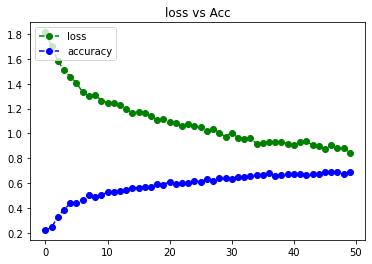

In [55]:
plt.plot(h['loss'],'go--')
plt.plot(h['accuracy'],'go--',color='blue')
# plt.plot(h['val_loss'],'go--',color='pink')
# plt.plot(h['val_accuracy'],'go--',color='green')
plt.title("loss vs Acc")
plt.legend(['loss', 'accuracy'], loc='upper left')
# plt.title("loss vs Acc vs Val_Acc vs Val_loss")
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


C:\Users\Trainee\AppData\Local\Temp\ipykernel_6856\1577112088.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(hisData.history[test], "go--", c='blue')


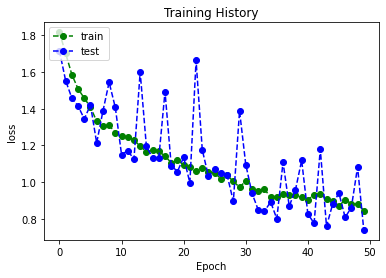

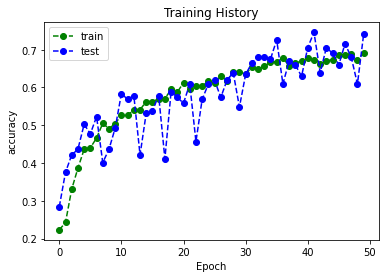

In [41]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train], "go--")
    plt.plot(hisData.history[test], "go--", c='blue')
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#### path for the image to see if it predicts correct class

In [43]:
path = 'garbage_classification_ai_challenge-dataset/TRAIN/plastic/010.jpg'
img = load_img(path,target_size=(128,128))

In [45]:
import numpy as np

In [54]:
i = img_to_array(img)
i = preprocess_input(img)
input_array = np.array([i])
input_array.shape

pred = np.argmax(model.predict(input_array))

if pred == 0:
    print("The image is cardboard")
elif pred ==1:
    print("The image is glass")
elif pred == 2:
    print("The image is metal")
elif pred ==3:
    print("The image is paper")
elif pred == 4:
    print("The image is plastic")
else:
    print("The image is trash")
    
    
#to display the image
plt.imshow(input_array[0])
plt.title("input Image")
plt.axis = False
plt.show()

NameError: name 'preprocess_input' is not defined

## GRAD-CAM

In [47]:
def get_img_arr(img_path):
    '''input: Takes in image peth
    output: Gives pre-process img
    '''
    path = img_path
    img = load_img
    
    img = load_img(path,target_size=(128,128))
    
    img = img_to_array(img)
    
    img = preprocess_input(img)
    
    #Expand the dimentions
    img = np.array([i])

    return img

In [48]:
import tensorflow as tf

In [49]:
def make_gracam_heatmap(img_array, model, last_conv_layer_name, pred_index= None):
    grad_model = tf.keras.models.Model(
        [model.input], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        
        if pred_index is None:
            
            pred_index = tf.argmax(preds[0])
                
        class_channel = preds[:,pred_index]
        
    grads = tape.gradient(class_channel, last_conv_layer_output)

    poole_grads = tf.reduce_mean(grads, axis =(0,1,2))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output @ poole_grads[..., tf.newaxis]

    heatmap= tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

## Mask HeatMap on Image

In [50]:
import matplotlib.cm as cm

from IPython.display import Image, display 

In [51]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha= 0.4):
    
    img = img_to_array(load_img(img_path))
    
    heatmap = np.uint8(255*heatmap)
    
    jet = cm.get_cmap("jet")
    
    jet_color = jet(np.arange(256))[:,:3]
    
    jet_heatmap = jet_color[heatmap]
    
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)
    
    superimposed_img = jet_heatmap * alpha +img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    
    superimposed_img.save(cam_path)
    
    display(Image(cam_path))
    
    

In [52]:
#predict the image

def image_prediction_and_visual(path,last_conv_layer_name="conv2d_9", model= model):
    
    img_array = get_img_arr(path)
    
    heatmap = make_gracam_heatmap(img_array, model, last_conv_layer_name)
    
    plt.title("the heatmap of the image")
    
    plt.imshow(heatmap)
    plt.show()
    
    
    pred = np.argmax(model.predict(preprocess_input(img_array)))
    
    if pred == 0:
        print("The image is cardboard")
    elif pred ==1:
        print("The image is glass")
    elif pred == 2:
        print("The image is metal")
    elif pred ==3:
        print("The image is paper")
    elif pred == 4:
        print("The image is plastic")
    else:
        print("The image is trash")
    
    
    
    #function call
    save_and_display_gradcam(path, heatmap)
    
    a = plt.imread(path)
    
    plt.imshow(a, cmap="gray")
    
    plt.title("original image")
    
    plt.show()

In [53]:
#function call
path = "garbage_classification_ai_challenge-dataset/TRAIN/plastic/004.jpg"

image_prediction_and_visual(path)

NameError: name 'preprocess_input' is not defined